In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA

In [74]:
df = pd.read_csv('CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## EDA

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [76]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [77]:
df.describe(include='object')

,CUST_ID
count,8950
unique,8950
top,C10001
freq,1


In [78]:
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

### 결측치 처리

In [79]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [80]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### outlier 처리

<AxesSubplot:>

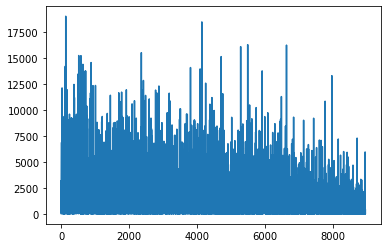

In [81]:
df['BALANCE'].plot()

<AxesSubplot:>

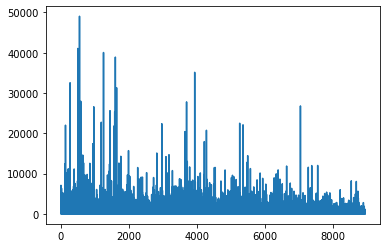

In [82]:
df.PURCHASES.plot()

In [83]:
def dealing_outliers(df, cols):
    for i in cols:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        IQR = q3 - q1
        rev_range = 1.5

        df = df[(df[i] <= q3 + (rev_range*IQR)) & (df[i] >= q1 - (rev_range*IQR))]
        df = df.reset_index(drop=True)

    return df

In [84]:
cols = df.columns
cols = cols.drop(['CUST_ID'])
cols

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [85]:
df_dropped = dealing_outliers(df, cols)
df_dropped

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
2,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
3,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
4,C10015,2772.772734,1.000000,0.00,0.00,0.00,346.811390,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,805.647974,989.962866,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,C18966,2492.463204,1.000000,0.00,0.00,0.00,2625.644609,0.000000,0.000000,0.000000,0.250000,7,0,3000.0,621.099464,1073.237454,0.000000,12
2086,C18970,11.442399,0.636364,82.00,0.00,82.00,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,1000.0,82.847064,80.676988,0.222222,12
2087,C18971,407.399529,1.000000,0.00,0.00,0.00,1364.307564,0.000000,0.000000,0.000000,0.166667,2,0,1500.0,98.494145,228.622281,0.000000,12
2088,C18980,87.026009,1.000000,605.52,0.00,605.52,0.000000,1.000000,0.000000,0.916667,0.000000,0,12,1500.0,511.637312,175.012705,0.000000,12


In [86]:
df_dropped = df_dropped.drop(['CUST_ID', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'TENURE'], axis=1)
df_dropped

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,1000.0,201.802084,139.509787,0.000000
1,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,1200.0,678.334763,244.791237,0.000000
2,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,2300.0,679.065082,532.033990,0.000000
3,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,7000.0,688.278568,311.963409,0.000000
4,2772.772734,1.000000,0.00,0.00,0.00,346.811390,0.000000,0.000000,0.000000,0.083333,3000.0,805.647974,989.962866,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,2492.463204,1.000000,0.00,0.00,0.00,2625.644609,0.000000,0.000000,0.000000,0.250000,3000.0,621.099464,1073.237454,0.000000
2086,11.442399,0.636364,82.00,0.00,82.00,0.000000,0.500000,0.000000,0.416667,0.000000,1000.0,82.847064,80.676988,0.222222
2087,407.399529,1.000000,0.00,0.00,0.00,1364.307564,0.000000,0.000000,0.000000,0.166667,1500.0,98.494145,228.622281,0.000000
2088,87.026009,1.000000,605.52,0.00,605.52,0.000000,1.000000,0.000000,0.916667,0.000000,1500.0,511.637312,175.012705,0.000000


### PCA

In [87]:
scaler = StandardScaler()
scaler.fit(df_dropped)
df_scaled = scaler.transform(df_dropped)
df_scaled

array([[-1.15204104, -1.75928151, -0.53280887, ..., -0.97707954,
        -0.98203018, -0.38353882],
       [-0.24705371,  0.3593577 , -0.78461677, ...,  0.27237209,
        -0.59698999, -0.38353882],
       [ 0.92486389,  0.3593577 ,  0.54799883, ...,  0.27428696,
         0.45352749, -0.38353882],
       ...,
       [-0.7250702 ,  0.3593577 , -0.83535891, ..., -1.24794926,
        -0.65612384, -0.38353882],
       [-1.09830514,  0.3593577 ,  1.08497759, ..., -0.16470266,
        -0.85218726, -0.38353882],
       [-0.84188675,  0.3593577 ,  2.04838065, ...,  0.96704422,
        -0.83665907, -0.38353882]])

In [88]:
pca = PCA(n_components=2)
pca.fit(df_scaled)

df_pca = pd.DataFrame(data=pca.transform(df_scaled), columns=['pc1', 'pc2'])
df_pca

,pc1,pc2
0,0.054697,-2.562585
1,-0.769602,-1.048107
2,2.078586,0.610458
3,1.652798,2.044206
4,-2.494667,1.237191
...,...,...
2085,-3.993713,2.022336
2086,1.756701,-4.081118
2087,-1.968586,-1.340091
2088,3.260651,-0.715409


### DBSCAN

In [89]:
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan.fit(df_pca)
df_pca['clusters'] = dbscan.labels_
df_pca

,pc1,pc2,clusters
0,0.054697,-2.562585,0
1,-0.769602,-1.048107,0
2,2.078586,0.610458,0
3,1.652798,2.044206,0
4,-2.494667,1.237191,0
...,...,...,...
2085,-3.993713,2.022336,-1
2086,1.756701,-4.081118,-1
2087,-1.968586,-1.340091,0
2088,3.260651,-0.715409,0


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

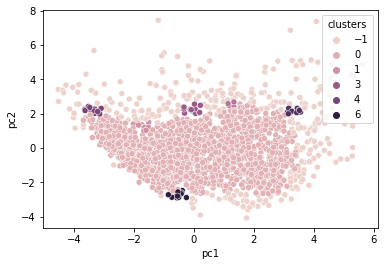

In [90]:
sns.scatterplot(x='pc1', y='pc2', hue='clusters', data=df_pca)

In [ ]:
for c in 

In [1]:
class Course:
    s_type = ['재학생', '대학원생']

    def __init__(self, course_name:str):
        self.course_name = course_name
        self.attendance = 0

    def printInfo(self):
        return self.course_name, self.attendance

    def setType(self, course_name):
        self.course_name = course_name

    def setAttendance(self, attendance):
        self.attendance = attendance

    def getGrade(self):
        grade = 'I'
        return grade

In [3]:
class PassFailCourse(Course):
    def __init__(self, course_name, s_type):
        super().__init__(course_name)
        
        self.s_type = s_type
        self.course_name = course_name
        self.grade_assignment = 0
        self.grade_quiz = 0
        self.presentation = 0

    def setAssignment(self, assignment):
        self.grade_assignment = assignment

    def setQuiz(self, quiz):
        self.grade_quiz = quiz

    def setPresentation(self, presentation):
        self.presentation = presentation

    def getAssignment(self):
        return self.grade_assignment
    
    def getQuiz(self):
        return self.grade_quiz

    def getPresentation(self):
        return self.presentation

    def totalScore(self):
        rate = [0.2, 0.3]
        self.result = ((self.attendance*rate[0]) + (self.grade_assignment*rate[1]) + (self.grade_quiz*rate[1]) + (self.presentation*rate[0]))
        return self.result

    def getGrade(self):
        grade = ['SC', 'NC']

        r = self.totalScore()
        if r >= 60:
            result = grade[0]
        else:
            result = grade[1]

        return result

    def __str__(self):
        info = f'과목명: {self.course_name}\n출석점수: {self.attendance}, 학생 유형: {self.s_type}\n보고서 점수: {self.grade_assignment}\n퀴즈 점수: {self.grade_quiz}\n발표 점수: {self.presentation}\n총 점: {self.totalScore()}'
        return info
        

In [4]:
class CourseDriver:
    def __init__(self, grade_assignment, grade_quiz, presentation, course_name, s_type, attendence):
        self.grade = PassFailCourse(course_name, s_type)
        self.grade.setAssignment(grade_assignment)
        self.grade.setAttendance(attendence)
        self.grade.setPresentation(presentation)
        self.grade.setQuiz(grade_quiz)

    def printInfo(self):
        print('-'*20)
        print(self.grade.__str__())
        print('-'*20)
        print(self.grade.getGrade())

In [7]:
writing = CourseDriver(
    course_name='글쓰기기초',
    attendence=80,
    s_type='재학생',
    grade_assignment=50,
    grade_quiz=50,
    presentation=50
)

writing.printInfo()


prog = CourseDriver(
    course_name='프로그래밍기초',
    attendence=100,
    s_type='대학원생',
    grade_assignment=100,
    grade_quiz=100,
    presentation=100
)
prog.printInfo()

--------------------
과목명: 글쓰기기초
출석점수: 80, 학생 유형: 재학생
보고서 점수: 50
퀴즈 점수: 50
발표 점수: 50
총 점: 56.0
--------------------
NC
--------------------
과목명: 프로그래밍기초
출석점수: 100, 학생 유형: 대학원생
보고서 점수: 100
퀴즈 점수: 100
발표 점수: 100
총 점: 100.0
--------------------
SC


In [8]:
import numpy as np

In [9]:
arr = np.array(range(1, 25)).reshape(4,6)
arr

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24]])

In [10]:
arr[1:3, 1:5]

array([[ 8,  9, 10, 11],
       [14, 15, 16, 17]])

In [11]:
arr[arr[:]%2==1]

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])